In [40]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
iris = load_iris()

In [41]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [42]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [48]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [49]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [50]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


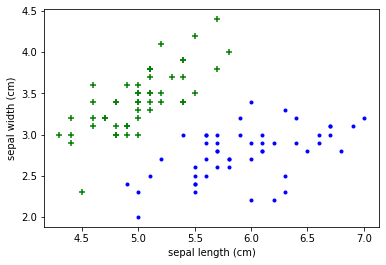

In [51]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='*')

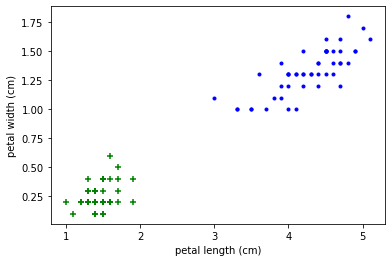

In [52]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')
#plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', marker='*')

In [53]:
selected_df = pd.concat([df0, df1], axis = 0)
print(selected_df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

    target flower_name  
0        0    

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = selected_df.drop(['petal length (cm)', 'petal width (cm)','target', 'flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [56]:
y = selected_df.target
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
print(len(X_train))
print(len(y_train))

80
80


In [59]:
len(X_test)

20

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [61]:
model = SVC(kernel='linear')

In [62]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [63]:
model.score(X_test, y_test)

1.0

In [64]:
y_pred = model.predict(X_test)

In [65]:
print(y_pred)

[1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1]


In [66]:
print(accuracy_score(y_test, y_pred))

1.0


In [67]:
import seaborn as sns
import numpy as np

In [69]:
#sns.scatterplot(x=X_train[:, 0])
print(X_train.shape)

(80, 2)


In [70]:
print(X_train['sepal length (cm)'])

35    5.0
82    5.8
37    4.9
13    4.3
79    5.7
     ... 
48    5.3
0     5.1
28    5.2
97    6.2
36    5.5
Name: sepal length (cm), Length: 80, dtype: float64


In [104]:
x = X_train.to_numpy()
#x

In [72]:
tx = x[:, 0] # sepal
#print(tx)

ty = x[:, 1]
print(ty)

[3.2 2.7 3.6 3.  2.6 2.6 3.  4.2 3.4 3.4 3.1 3.2 3.  3.5 2.8 3.8 2.3 2.8
 3.5 2.3 2.8 2.4 2.7 2.4 3.1 3.4 2.7 3.2 2.4 3.6 2.  3.4 3.9 3.  2.9 3.4
 3.2 2.9 4.4 2.5 4.  4.1 2.2 3.5 2.2 2.9 3.1 3.  3.1 2.5 3.  3.2 2.9 3.4
 3.7 3.  3.8 2.3 3.1 3.4 3.4 2.6 2.7 2.5 2.8 2.7 3.1 3.  3.7 3.3 2.9 3.5
 3.  3.1 3.3 3.7 3.5 3.4 2.9 3.5]


In [73]:
y = y_train.to_numpy()
print(y)

[0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 0 0 0 0 1 0]


In [ ]:
Calculating a decision boundary

w1, w2 : [ 2.22230911 -2.22151945]
b :  -5.002486141899086
x_points:  [4.         4.07142857 4.14285714 4.21428571 4.28571429 4.35714286
 4.42857143 4.5        4.57142857 4.64285714 4.71428571 4.78571429
 4.85714286 4.92857143 5.         5.07142857 5.14285714 5.21428571
 5.28571429 5.35714286 5.42857143 5.5        5.57142857 5.64285714
 5.71428571 5.78571429 5.85714286 5.92857143 6.         6.07142857
 6.14285714 6.21428571 6.28571429 6.35714286 6.42857143 6.5
 6.57142857 6.64285714 6.71428571 6.78571429 6.85714286 6.92857143
 7.         7.07142857 7.14285714 7.21428571 7.28571429 7.35714286
 7.42857143 7.5       ]
y_points:  [1.74959094 1.8210449  1.89249886 1.96395283 2.03540679 2.10686075
 2.17831471 2.24976867 2.32122263 2.39267659 2.46413056 2.53558452
 2.60703848 2.67849244 2.7499464  2.82140036 2.89285432 2.96430829
 3.03576225 3.10721621 3.17867017 3.25012413 3.32157809 3.39303205
 3.46448602 3.53593998 3.60739394 3.6788479  3.75030186 3.82175582
 3.89320978 3.96466374 4.036117

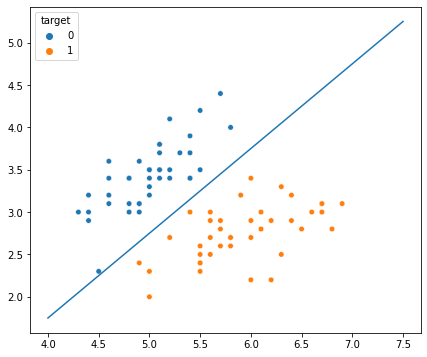

In [100]:
#constructing a hyperplane using formula
# w1x1 + w2x2 + b = 0

w = model.coef_[0]
print("w1, w2 :", w)

b = model.intercept_[0]
print("b : ", b)

# generating random x points from 4 to 7.5 because selected_df data range between 4 to 8
x_points = np.linspace(4, 7.5)
print("x_points: ", x_points)

#getting corresponding y -points
y_points = -(w[0] / w[1]) * x_points - b / w[1]
print("y_points: ", y_points)

plt.figure(figsize = (7, 6))
sns.scatterplot(x=tx, y=ty, hue = y_train, s=30)
plt.plot(x_points, y_points)

# Calculate margin for SVM

Step 1. Find a normal vector to the decision boundary;
Step 2. Calculate a unit vector of that normal vector -- let's call it `w_hat`;
Step 3. Get a distance between the lines (margin);
Step 4. Translate all points of the decision boundary to a new location by this formula:
- for a line above :
new_points_above = hyperplane_points + w_hat * margin
- for a line below :
new_points_below = hyperplane_points - w_hat * margin

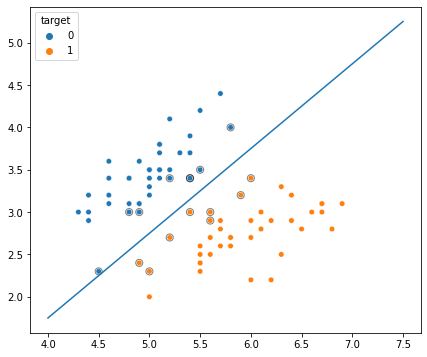

In [102]:
# data points near decision boundary

plt.figure(figsize = (7, 6))
sns.scatterplot(x=tx, y=ty, hue = y_train, s=30)
plt.plot(x_points, y_points)
# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);

In [89]:
# Calculating the unit vector of w
w_hat = model.coef_[0] / (np.sqrt(np.sum(model.coef_[0] ** 2)))
print(w_hat)

[ 0.70723242 -0.70698112]


In [90]:
# Calculate margin
margin = 1 / np.sqrt(np.sum(model.coef_[0] ** 2))
print(margin)

0.318242145993733


In [85]:
#calculate points of the margin lines:

decision_boundary_points = np.array(list(zip(x_points, y_points)))
#print(decision_boundary_points)
points_of_line_above = decision_boundary_points + w_hat * margin
#print(points_of_line_above)
points_of_line_below = decision_boundary_points - w_hat * margin
#print(points_of_line_below)

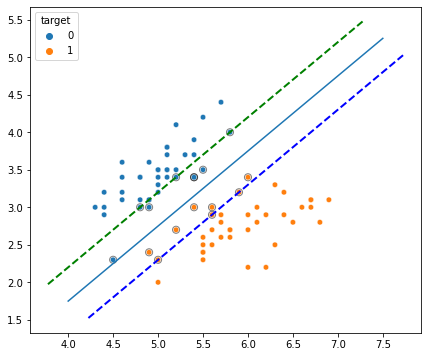

In [103]:
# Final output

plt.figure(figsize = (7, 6))
sns.scatterplot(x=tx, y=ty, hue = y_train, s=30)
plt.plot(x_points, y_points)
# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);
#Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)